In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d
plt.rc('font', family='serif')
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))

train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-1]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-1]), df_pions[-1000:,-1]
opt = ['SGD','RMSprop','Adam','NAdam','Adamax']

In [3]:
def optimiser_test(optimiser_list,repeats):
    no_optimsier = len(optimiser_list)
    is_last_val_bool = np.zeros(no_optimsier)
    min_mape = np.zeros((no_optimsier,repeats))
    for i in range(no_optimsier):
        last_val_bool = 0
        for j in range(repeats):
            df = pd.DataFrame(cf.trained_network(train_x,train_y,val_x,val_y,[512,512], optimizer= optimiser_list[i], verbose= 0,epochs = 100, batch_size= 256, ).history)
            val_mape_ar_smoothed = cf.exponetial_smoothing(np.array(df['val_mean_absolute_percentage_error']),0.4)
            loss_ar_smoothed = cf.exponetial_smoothing(np.array(df['loss']),0.4)
            min_mape[i,j] = np.min(val_mape_ar_smoothed)
            if cf.neg_grad_tester(val_mape_ar_smoothed,loss_ar_smoothed):
                last_val_bool +=1
                print('Negative Grad Identified')
            else:
                pass
        if last_val_bool >= repeats/4:
            is_last_val_bool[i] = 1
        else:
            is_last_val_bool[i] = 0
    return min_mape, is_last_val_bool

In [4]:
min_mape ,bool = optimiser_test(opt,10)



2021-12-06 17:06:34.990044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 17:06:34.994967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 17:06:34.995245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 17:06:34.995663: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

TypeError: build() got an unexpected keyword argument 'initalizer'

[          nan 2784.73713486           nan           nan 3483.24271216
           nan           nan 1981.30529785 3588.58495999           nan]


Text(0, 0.5, 'Mean Min MAPE')

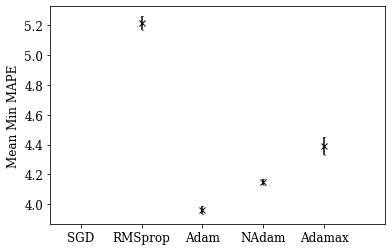

In [ ]:
mean_min_mape = np.mean(min_mape,axis = 1)
print(min_mape[0,:])
ste = np.std(min_mape,axis = 1)/10**0.5
fig = plt.figure()
plt.errorbar(range(5),mean_min_mape,ste, linestyle = '' , marker = 'x',capsize= 0.5,c = 'black')
plt.xticks(range(5),opt)
plt.xlim(-0.5,5)
plt.ylabel('Mean Min MAPE')


In [ ]:
np.savetxt('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Sean_Working_Notebooks/Testing_Notebooks/optimisers.csv',min_mape)
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/diff_opt.png',dpi = 300)